# Efficient Kmeans

In [218]:
# Importations

import numpy as np
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import sys
import matplotlib.pyplot as plt

In [269]:
# Data Loading
data = pd.read_csv('input.csv')
data.columns = ['x', 'y']
data.head()

C0 = np.array([[0.357, 0.253],
             [0.055, 4.392],
             [2.674, 0.001],
             [1.044, 1.251],
             [1.495, 0.090]])
names = np.array(['Adam', 'Bob', 'Charley', 'David', 'Edward'])



In [302]:
# Kmeans Implementation
# Two steps at each iteration: expectation and maximization

def assign_labels(X, centroids, k):
    """
    Assigns the closest centroid to each data point
    """
    Xr = np.stack([X for i in range(k)], axis = -1)
    
    distances = np.sum(np.square(Xr - centroids.T), axis = 1)
    
    return(np.argmin(distances, axis = -1), np.sum(np.min(distances, axis = -1)))

def update_centroids(X, labels, k):
    """
    Updates the centroids given the label assignation computer before
    """
    return(np.array([np.mean(X[labels == c], axis = 0) for c in range(k)]))

def KMeans(X, C0, Niter = 300):
    """
    Labels the input distribution into classes using the K-means algorithm
    
    Parameters
    ----------
        X : Array containing datapoints
        C0 : Array containing initial centroids
        Niter : Number of iterations to run
    Returns
    -------
        labels: label[i] is the label of the i-th observation X[i]
        centroids: final centroids
        errors: inertia at each iteration
    """
    
    k = np.shape(C0)[0] # number of clusters = number of initial centroids
    centroids = C0 # Centroids
    errors = np.zeros(Niter + 1) # Mean quadratic errors
    
    ## Compute initial labels
    
    labels, error = assign_labels(X, centroids, k)
    errors[0] = error
    
    ## Iterate 
    for t in range(Niter):        
        # Update centroids
        centroids = update_centroids(X, labels, k)
        
        # Assign labels using the new centroids, store the mean quadratic error
        labels, error = assign_labels(X, centroids, k)
        
        errors[t + 1] = error
        
    return labels, centroids, errors
              

In [303]:
# Run the clustering
labels, centroids, errors = KMeans(X, C0, 100)

Text(0,0.5,'Error')

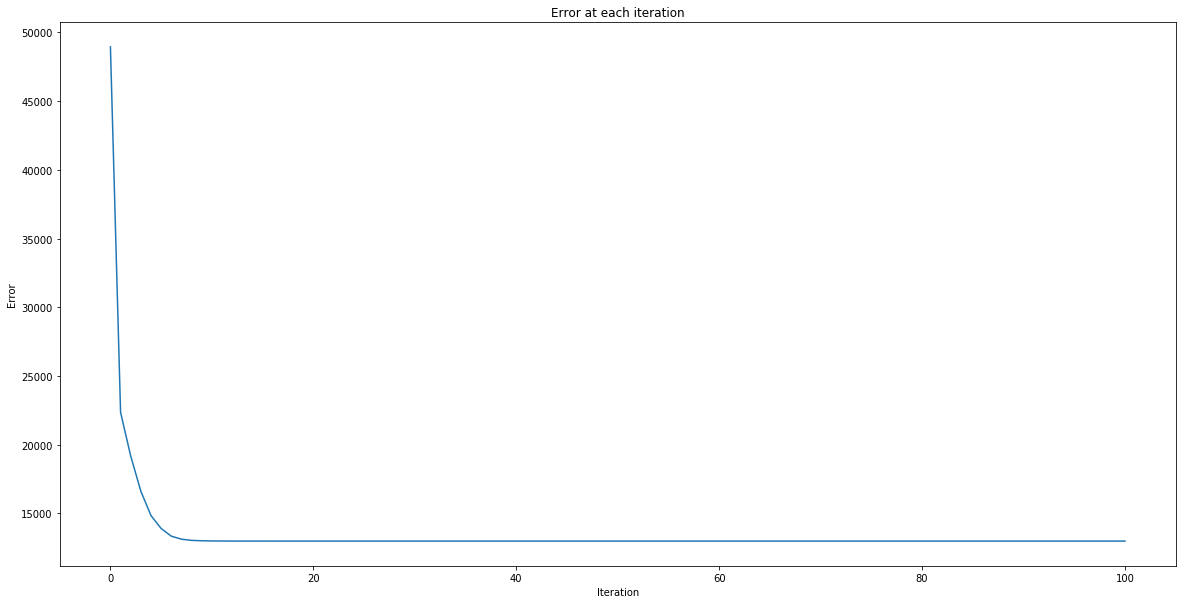

In [304]:
# Plot the error
plt.figure(figsize = (20, 10))
plt.plot(errors)
plt.title("Error at each iteration")
plt.xlabel("Iteration")
plt.ylabel("Error")

It can be seen that the error stabilizes after 10 iterations.

In [316]:
print('The final error is %.3f' % (errors[-1]))

The final error is 12989.916


In [320]:
labels

array([2, 3, 3, ..., 0, 1, 4])

In [319]:
# Save the result
np.savetxt("OUTPUT.txt", labels, fmt = "%d", header = "error: %.3f" % errors[-1])

In [276]:
#Plot the result

def plot_result(data, labels, centroids):
    """ 
    Interactive plot of the clustering result
    """
    plot_data = [go.Scatter(x = data.x.values,
                            y = data.y.values,
                            mode = 'markers',
                            text = label_names,
                            name = 'Data Points',
                            marker = dict(color = labels,
                                          colorscale = 'Viridis')),
                 go.Scatter(x = centroids[:, 0],
                            y = centroids[:, 1],
                            mode = 'markers',
                            text = names,
                            marker = dict(color = np.random.rand(centroids.shape[0]),
                                          size = 10),
                            name = 'Centroids')]


    plot_layout = go.Layout(dict(title = 'Input data',
                                 xaxis = dict(title = 'x'),
                                 yaxis = dict(title = 'y'),
                                 hovermode = 'closest'))

    py.iplot(dict(data = plot_data,
                  layout = plot_layout))
plot_result(data = data, labels = labels, centroids = centroids)                         